### Importing Necessary Libraries

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

### Loading and Displaying the Dataset

In [2]:
data = pd.read_csv('adult_with_headers.csv')
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Exploring the Dataset and Data Type Optimization

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
data['age']=data['age'].astype('int8')
data['education_num'] = data['education_num'].astype('int8')
data['hours_per_week'] = data['hours_per_week'].astype('int8')

In [5]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


### Dropping Unnecessary Columns

In [6]:
data['capital_gain'].value_counts()

capital_gain
0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: count, Length: 119, dtype: int64

In [7]:
data['capital_loss'].value_counts()

capital_loss
0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: count, Length: 92, dtype: int64

The majority of the data in the capital gain and capital loss columns is 0, making these columns less important from a prediction perspective. Therefore, I will remove them.

In [8]:
data.drop(columns=['capital_loss','capital_gain'],inplace=True)

In [9]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [10]:
data[data.duplicated(keep=False)==True]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
2303,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,35,United-States,<=50K
3815,20,Private,196745,Some-college,10,Never-married,Other-service,Own-child,White,Female,16,United-States,<=50K
3917,19,Private,251579,Some-college,10,Never-married,Other-service,Own-child,White,Male,14,United-States,<=50K
4325,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,40,Mexico,<=50K
4767,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,10,United-States,<=50K
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,40,Mexico,<=50K
4940,38,Private,207202,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,48,United-States,>50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,35,United-States,<=50K
5579,27,Private,255582,HS-grad,9,Never-married,Machine-op-inspct,Not-in-family,White,Female,40,United-States,<=50K
5805,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,10,United-States,<=50K


### Removing Duplicate Entries

In [11]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(32535, 13)

In [13]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [14]:
data['workclass'].value_counts()

workclass
Private             22671
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

### Stripping Whitespace from Categorical Columns

In [15]:
data['workclass'] = data['workclass'].apply(lambda x:x.strip())
data['marital_status'] = data['marital_status'].apply(lambda x:x.strip())
data['occupation'] = data['occupation'].apply(lambda x:x.strip())
data['relationship'] = data['relationship'].apply(lambda x:x.strip())
data['race'] = data['race'].apply(lambda x:x.strip())
data['sex'] = data['sex'].apply(lambda x:x.strip())
data['native_country'] = data['native_country'].apply(lambda x:x.strip())
data['income'] = data['income'].apply(lambda x:x.strip())
data['education'] = data['education'].apply(lambda x:x.strip())

### Standardizing Categorical Values

I standardizes categorical values by consolidating similar categories and correcting specific entries in the workclass, marital_status, and native_country columns.

In [16]:
data['workclass'] = data['workclass'].apply(lambda x: 'Private' if x == 'Private' else
                                            ('Self-employed' if x in ['Self-emp-not-inc', 'Self-emp-inc'] else
                                            ('Government' if x in ['Local-gov', 'State-gov', 'Federal-gov'] else
                                            ('Unemployed' if x in ['Without-pay', 'Never-worked'] else
                                            ('Unknown' if x == '?' else x)))))

In [17]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,39,Government,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,50,Self-employed,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


In [18]:
data['marital_status'].value_counts()

marital_status
Married-civ-spouse       14969
Never-married            10666
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [19]:
data['marital_status'] = data['marital_status'].apply(
    lambda status: 'Married' if status in ['Married-civ-spouse', 'Married-AF-spouse', 'Married-spouse-absent']
    else 'Single' if status == 'Never-married'
    else 'Divorced' if status == 'Divorced'
    else 'Separated' if status == 'Separated'
    else 'Widowed' if status == 'Widowed'
    else status  
)

The code simplifies the marital_status column by grouping specific statuses into broader categories like 'Married', 'Single', 'Divorced', 'Separated', and 'Widowed', while leaving other values unchanged.

In [20]:
data['occupation'].value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3290
Machine-op-inspct    1999
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [21]:
data['occupation'] = data['occupation'].replace({'?':"Unknown"})

In [22]:
data['relationship'].value_counts()

relationship
Husband           13186
Not-in-family      8292
Own-child          5063
Unmarried          3445
Wife               1568
Other-relative      981
Name: count, dtype: int64

In [23]:
data['race'].value_counts()

race
White                 27793
Black                  3122
Asian-Pac-Islander     1038
Amer-Indian-Eskimo      311
Other                   271
Name: count, dtype: int64

In [24]:
data['sex'].value_counts()

sex
Male      21774
Female    10761
Name: count, dtype: int64

In [25]:
data['native_country'].value_counts()

native_country
United-States                 29151
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Japan                            62
Guatemala                        62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

In [26]:
data['native_country'] = data['native_country'].replace('outlying-us(guam-usvi-etc)', 'united states')
data['native_country'] = data['native_country'].replace('holand-netherlands', 'netherlands')
data['native_country'] = data['native_country'].replace('?', 'Unkown')


In [27]:
data['income'].value_counts()

income
<=50K    24696
>50K      7839
Name: count, dtype: int64

### Visualizing Data Distributions and Transformations

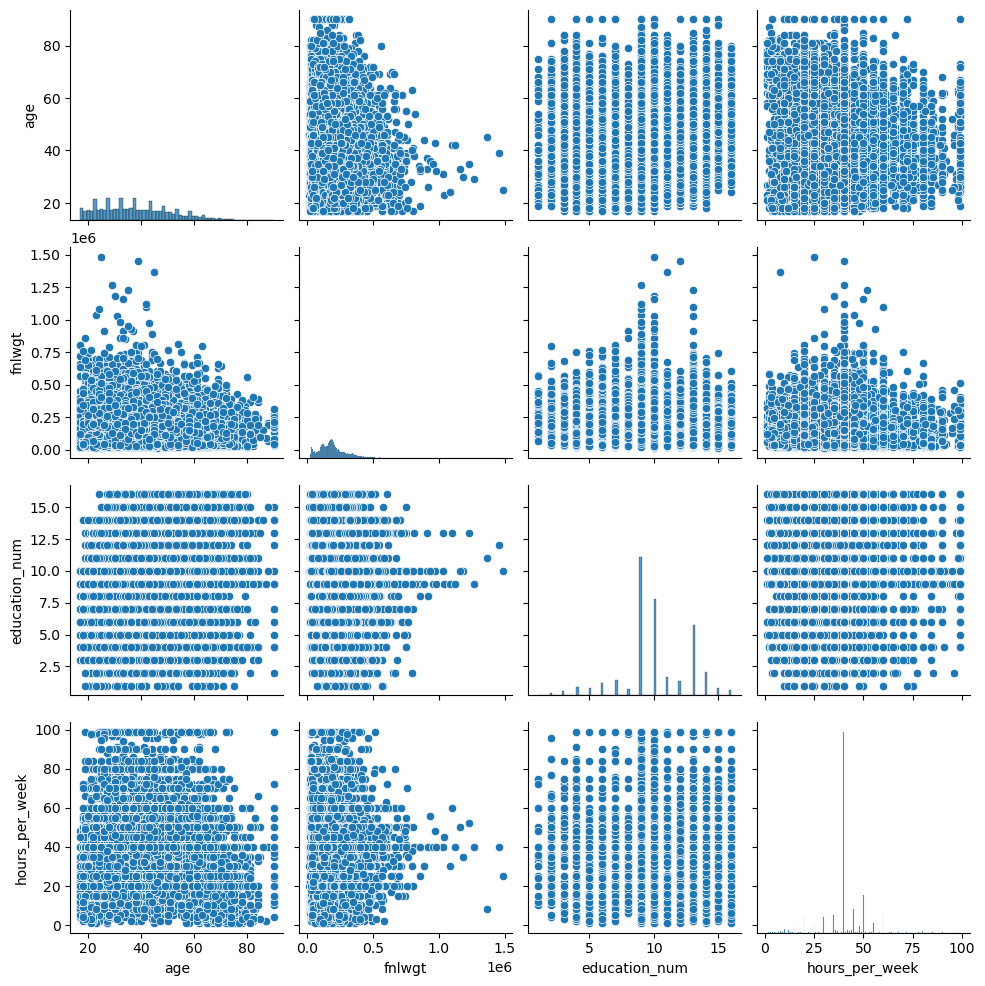

In [28]:
numerical_df = data.select_dtypes(include=['number'])
sns.pairplot(numerical_df)
plt.show()

<Axes: xlabel='age', ylabel='Count'>

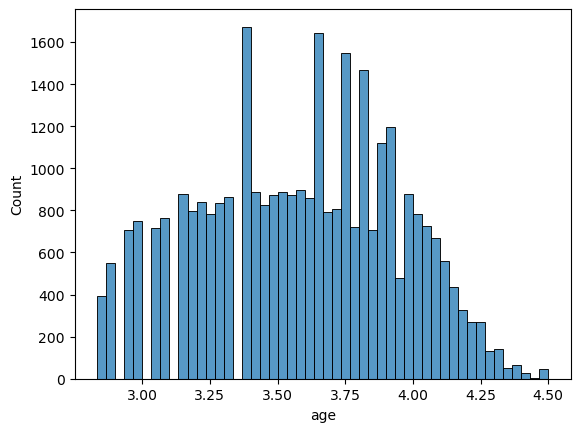

In [29]:
sns.histplot(np.log(data['age']))

In [30]:
data['age'] = np.log(data['age'])

In [31]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income
0,3.664062,Government,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K
1,3.912109,Self-employed,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K
2,3.636719,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
3,3.970703,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
4,3.332031,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K


### Add Two New Features

In [32]:
data['hours_per_year'] = data['hours_per_week']
data['hours_per_year'] = data['hours_per_year'].apply(lambda x : x*52)

In [33]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,income,hours_per_year
0,3.664062,Government,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,40,United-States,<=50K,2080
1,3.912109,Self-employed,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,13,United-States,<=50K,676
2,3.636719,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K,2080
3,3.970703,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K,2080
4,3.332031,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K,2080


In [34]:
data['work_hours_category'] = pd.cut(data['hours_per_week'], bins=[0, 20, 40, 60, 100], labels=['Part-time', 'Full-time', 'Overtime', 'Extreme'])

In [35]:
data['work_hours_category'].value_counts()

work_hours_category
Full-time    20036
Overtime      8466
Part-time     2923
Extreme       1110
Name: count, dtype: int64

### One-Hot Encoding of Categorical Features

In [36]:
data = pd.get_dummies(data, columns=['workclass','marital_status','race','work_hours_category'])

### Label Encoding of Categorical Features

In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
columns_to_encode = ['education', 'occupation', 'relationship', 'sex', 'native_country', 'income']
for column in columns_to_encode:
    data[column + '_encoded'] = label_encoder.fit_transform(data[column])
    data.drop(columns=[column], inplace=True)

One-Hot Encoding

Pros:

Avoids Ordinal Relationships:

One-Hot Encoding creates binary columns for each category, which prevents algorithms from assuming an ordinal relationship where none exists. For instance, in a feature like "Color" with categories "Red", "Blue", and "Green", One-Hot Encoding treats these as separate categories without any inherent order.

Suitable for Nominal Data:

It's ideal for nominal data where no order or ranking is implied (e.g., colors, cities).
Compatible with Many Algorithms:

Many machine learning algorithms, especially those that do not assume any inherent ordering of categories (like linear regression or logistic regression), work well with One-Hot Encoded data.

Cons:

High Dimensionality:

One-Hot Encoding can significantly increase the number of features, especially if the categorical variable has many unique categories. This can lead to higher memory usage and computational costs.

Sparse Data:

The resulting encoded data is sparse (i.e., mostly filled with zeros), which may lead to inefficiencies in some algorithms.

Increased Complexity:

For large datasets with many categorical features, One-Hot Encoding can make data handling and processing more complex.

Label Encoding

Pros:

Simplicity:

Label Encoding is straightforward and easy to implement. It converts each category into a unique integer, making it simple to handle and requiring less memory compared to One-Hot Encoding.

Preserves Original Data Structure:

It keeps the original number of features unchanged, which is beneficial for models where feature space size is a concern.

Efficient Storage:

Since it represents categories as integers, it is more memory-efficient than One-Hot Encoding when dealing with many categories.

Cons:

Implied Ordinal Relationships:

Label Encoding can inadvertently imply an ordinal relationship between categories. For example, encoding "Red" as 0, "Blue" as 1, and "Green" as 2 might lead algorithms to assume that "Blue" is somehow between "Red" and "Green" in a meaningful way, which may not be true for nominal data.

Not Suitable for Algorithms Sensitive to Ordinal Relationships:

Algorithms that interpret the integer values as ordinal (e.g., decision trees, some types of regression) might not perform well with Label Encoded data if the categories do not have an inherent order.

Limited Use with Non-Ordinal Data:

Label Encoding is generally not recommended for nominal data with no natural ordering, as it can mislead the model about the relationship between categories.

When to Use Which

Use One-Hot Encoding:

When you have nominal categorical features with no inherent order.
When you are working with algorithms that are sensitive to the magnitude of numerical inputs (e.g., linear models, neural networks).

Use Label Encoding:

When you have ordinal categorical features with a natural ordering (e.g., "Low", "Medium", "High").
When you need a memory-efficient representation and are working with models that can handle or do not misinterpret ordinal data.

In [38]:
data.head()

,age,fnlwgt,education_num,hours_per_week,hours_per_year,workclass_Government,workclass_Private,workclass_Self-employed,workclass_Unemployed,workclass_Unknown,...,work_hours_category_Part-time,work_hours_category_Full-time,work_hours_category_Overtime,work_hours_category_Extreme,education_encoded,occupation_encoded,relationship_encoded,sex_encoded,native_country_encoded,income_encoded
0,3.664062,77516,13,40,2080,True,False,False,False,False,...,False,True,False,False,9,0,1,1,38,0
1,3.912109,83311,13,13,676,False,False,True,False,False,...,True,False,False,False,9,3,0,1,38,0
2,3.636719,215646,9,40,2080,False,True,False,False,False,...,False,True,False,False,11,5,1,1,38,0
3,3.970703,234721,7,40,2080,False,True,False,False,False,...,False,True,False,False,1,5,0,1,38,0
4,3.332031,338409,13,40,2080,False,True,False,False,False,...,False,True,False,False,9,9,5,0,4,0


Standard Scaling 
Scenario:

Algorithms Sensitive to Feature Scales: Algorithms like Support Vector Machines (SVM), Principal Component Analysis (PCA), and K-Nearest Neighbors (KNN) benefit from standard scaling because they rely on distance metrics and gradients which are affected by the scale of the features.

Data with Varying Units: When your features are in different units (e.g., height in cm and weight in kg), standard scaling helps normalize the contribution of each feature.

Why Preferred:

Mean and Standard Deviation: Standard scaling transforms features to have a mean of 0 and a standard deviation of 1, which ensures that each feature contributes equally regardless of its original scale.

Gaussian Distribution: If the features are approximately normally distributed, standard scaling can make them more suitable for algorithms that assume normality.

Min-Max Scaling (Normalization)
Scenario:

Algorithms Requiring Data within a Specific Range: Neural networks, gradient descent-based algorithms, and algorithms that assume data is bounded (e.g., some clustering algorithms) benefit from min-max scaling.

Data with Known Bounds: When the range of the data is known and you want to ensure that all features are within a specific range (e.g., [0, 1]), min-max scaling is appropriate.

Why Preferred:

Bounded Range: Min-max scaling transforms features to a specified range, ensuring that all features are on a similar scale, which can improve convergence in algorithms that are sensitive to the scale of input features.

Preservation of Relationships: It maintains the relationships between features by keeping the range and distribution consistent, which can be beneficial when the data distribution is not normal.

In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_standard_scaled = scaler.fit_transform(data)

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_MinMax_scaled = scaler.fit_transform(data)

In [41]:
data.replace({True: 1, False: 0}, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_8180\202298737.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({True: 1, False: 0}, inplace=True)


In [42]:
data.columns

Index(['age', 'fnlwgt', 'education_num', 'hours_per_week', 'hours_per_year',
       'workclass_Government', 'workclass_Private', 'workclass_Self-employed',
       'workclass_Unemployed', 'workclass_Unknown', 'marital_status_Divorced',
       'marital_status_Married', 'marital_status_Separated',
       'marital_status_Single', 'marital_status_Widowed',
       'race_Amer-Indian-Eskimo', 'race_Asian-Pac-Islander', 'race_Black',
       'race_Other', 'race_White', 'work_hours_category_Part-time',
       'work_hours_category_Full-time', 'work_hours_category_Overtime',
       'work_hours_category_Extreme', 'education_encoded',
       'occupation_encoded', 'relationship_encoded', 'sex_encoded',
       'native_country_encoded', 'income_encoded'],
      dtype='object')

In [43]:
from sklearn.ensemble import IsolationForest

# Instantiate the Isolation Forest
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination to the expected proportion of outliers

# Fit the model and predict outliers
outliers = iso_forest.fit_predict(data)  # Returns -1 for outliers, 1 for normal points

# Filter out the outliers
data_no_outliers = data[outliers == 1]


In [44]:
data_no_outliers

,age,fnlwgt,education_num,hours_per_week,hours_per_year,workclass_Government,workclass_Private,workclass_Self-employed,workclass_Unemployed,workclass_Unknown,...,work_hours_category_Part-time,work_hours_category_Full-time,work_hours_category_Overtime,work_hours_category_Extreme,education_encoded,occupation_encoded,relationship_encoded,sex_encoded,native_country_encoded,income_encoded
0,3.664062,77516,13,40,2080,1,0,0,0,0,...,0,1,0,0,9,0,1,1,38,0
1,3.912109,83311,13,13,676,0,0,1,0,0,...,1,0,0,0,9,3,0,1,38,0
2,3.636719,215646,9,40,2080,0,1,0,0,0,...,0,1,0,0,11,5,1,1,38,0
3,3.970703,234721,7,40,2080,0,1,0,0,0,...,0,1,0,0,1,5,0,1,38,0
4,3.332031,338409,13,40,2080,0,1,0,0,0,...,0,1,0,0,9,9,5,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,3.294922,257302,12,38,1976,0,1,0,0,0,...,0,1,0,0,7,12,5,0,38,0
32557,3.689453,154374,9,40,2080,0,1,0,0,0,...,0,1,0,0,11,6,0,1,38,1
32558,4.058594,151910,9,40,2080,0,1,0,0,0,...,0,1,0,0,11,0,4,0,38,0
32559,3.091797,201490,9,20,1040,0,1,0,0,0,...,1,0,0,0,11,0,3,1,38,0


How Outliers Affect Model Performance

Bias and Variance: Outliers can introduce bias and increase variance, leading to less reliable predictions.

Model Fit: They can skew the model fitting, making it less effective. For instance, linear models and distance-based algorithms are particularly sensitive to outliers.

Performance Metrics: Outliers can distort performance metrics, such as mean squared error or R-squared, leading to misleading evaluations of model performance.

In [45]:
import ppscore as pps

# Compute PPS matrix
pps_matrix = pps.matrix(data_no_outliers)

print(pps_matrix)


ModuleNotFoundError: No module named 'ppscore'

In [ ]:
# Extract the top feature pairs with the highest predictive power score
top_features = pps_matrix.sort_values(by='ppscore', ascending=False).head(10)
print("\nTop Feature Pairs with Highest Predictive Power Score:")
print(top_features)

# Assuming 'your_target_variable' is the name of the target feature
target_feature = 'your_target_variable'  # Replace with your actual target variable

# Extract insights for features with high predictive power scores with the target variable
target_insights = pps_matrix[(pps_matrix['x'] == target_feature) | (pps_matrix['y'] == target_feature)]
print(f"\nFeatures with High Predictive Power Scores with '{target_feature}':")
print(target_insights)

# Example of inspecting the baseline_score and model_score
print("\nBaseline and Model Scores:")
print(pps_matrix[['x', 'y', 'baseline_score', 'model_score']].sort_values(by='model_score', ascending=False))

High Predictive Power Scores:

hours_per_week and hours_per_year show very high predictive power scores (close to 1.000) for categories like Full-time, Overtime, Part-time, and Extreme. This suggests that these features are very influential in predicting work hours categories.

Marital Status and Race also show relatively high scores, though not as high as work hours-related features.
Predictive Power Scores with 'income_encoded':

income_encoded itself has a perfect score of 1.000, indicating that it is perfectly predictive of itself.

education_num and marital_status_Married have the highest predictive scores among other features for predicting income_encoded.

Regression Metrics:

The mean absolute error (MAE) values for DecisionTreeRegressor vary significantly. Some features have very low MAE values (close to 0.000), while others, like hours_per_week and hours_per_year, have higher MAE values indicating potential challenges in their predictive performance.

In [46]:
# Compute correlation matrix
correlation_matrix = data_no_outliers.corr()

correlation_matrix


,age,fnlwgt,education_num,hours_per_week,hours_per_year,workclass_Government,workclass_Private,workclass_Self-employed,workclass_Unemployed,workclass_Unknown,...,work_hours_category_Part-time,work_hours_category_Full-time,work_hours_category_Overtime,work_hours_category_Extreme,education_encoded,occupation_encoded,relationship_encoded,sex_encoded,native_country_encoded,income_encoded
age,1.000000,-0.071225,0.086474,0.179813,0.179813,0.095144,-0.180748,0.180484,-0.008411,-0.032819,...,-0.153092,-0.025641,0.106060,0.031354,0.011204,-0.025324,-0.304636,0.126767,-0.002611,0.281782
fnlwgt,-0.071225,1.000000,-0.045316,-0.021302,-0.021302,-0.013568,0.043353,-0.048379,0.001084,0.000420,...,-0.011415,0.041047,-0.031712,-0.017389,-0.029825,0.001865,0.006349,0.029108,-0.067213,-0.009475
education_num,0.086474,-0.045316,1.000000,0.144759,0.144759,0.157277,-0.131458,0.059281,-0.016229,-0.058232,...,-0.054651,-0.140645,0.173356,0.032999,0.339167,0.060462,-0.092686,0.004190,0.096111,0.332868
hours_per_week,0.179813,-0.021302,0.144759,1.000000,1.000000,-0.002077,-0.050543,0.149136,-0.018990,-0.111832,...,-0.615704,-0.312534,0.523368,0.483513,0.044445,-0.029501,-0.266440,0.229762,0.007589,0.240136
hours_per_year,0.179813,-0.021302,0.144759,1.000000,1.000000,-0.002077,-0.050543,0.149136,-0.018990,-0.111832,...,-0.615704,-0.312534,0.523368,0.483513,0.044445,-0.029501,-0.266440,0.229762,0.007589,0.240136
workclass_Government,0.095144,-0.013568,0.157277,-0.002077,-0.002077,1.000000,-0.617145,-0.134003,-0.009790,-0.080648,...,-0.033657,0.073717,-0.052472,-0.022488,0.054522,-0.018950,-0.004668,-0.031496,0.038264,0.063100
workclass_Private,-0.180748,0.043353,-0.131458,-0.050543,-0.050543,-0.617145,1.000000,-0.558724,-0.040818,-0.336261,...,0.006495,0.031812,-0.019850,-0.050661,-0.059625,-0.137667,0.083541,-0.066748,-0.051850,-0.087917
workclass_Self-employed,0.180484,-0.048379,0.059281,0.149136,0.149136,-0.134003,-0.558724,1.000000,-0.008863,-0.073014,...,-0.014959,-0.155638,0.135672,0.116569,0.023307,-0.026050,-0.150446,0.149160,0.023621,0.104236
workclass_Unemployed,-0.008411,0.001084,-0.016229,-0.018990,-0.018990,-0.009790,-0.040818,-0.008863,1.000000,-0.005334,...,0.022574,-0.007362,-0.006507,0.003600,-0.005173,0.008637,0.024805,-0.001819,0.006293,-0.014429
workclass_Unknown,-0.032819,0.000420,-0.058232,-0.111832,-0.111832,-0.080648,-0.336261,-0.073014,-0.005334,1.000000,...,0.061932,0.047540,-0.077098,-0.029985,0.006912,0.378613,0.050604,-0.028717,0.014724,-0.068170


Correlation Patterns:

High Correlations:

hours_per_week and hours_per_year are strongly correlated (1.0). This is expected as they are directly related (typically, hours_per_year = hours_per_week × weeks_per_year).

work_hours_category_Part-time and work_hours_category_Full-time have a strong negative correlation (-0.644), suggesting that individuals classified in one category are less likely to be classified in the other.
Feature Groups:

Work Class Features:

There is a noticeable negative correlation between work class categories (e.g., workclass_Private and workclass_Self-employed have a correlation of -0.539), indicating that individuals in one work class are less likely to be in another.

Marital Status:

marital_status_Single shows a strong negative correlation with marital_status_Married (-0.588), which aligns with the expectation that being single is negatively correlated with being married.

marital_status_Married has a positive correlation with income_encoded (0.357943), indicating that married individuals might have higher incomes on average.

Education and Income:

education_num has a high positive correlation with income_encoded (0.335268), suggesting that higher education levels are associated with higher income.

education_encoded also shows a moderate positive correlation with income_encoded (0.079393), indicating a similar trend.
Demographic Features:

sex_encoded shows a moderate positive correlation with income_encoded (0.215967). This might suggest some gender-based income differences in the dataset.

native_country_encoded has a low positive correlation with income_encoded (0.022796), suggesting that native country has a minimal direct impact on income in this dataset.

Categorical Encoding:

race_White shows a moderate positive correlation with income_encoded (0.085250), indicating that individuals categorized as White might have higher incomes on average.

Occupation Features:

occupation_encoded has a positive correlation with income_encoded (0.010675), though the correlation is relatively low. This implies that occupation type has a minor effect on income.
